In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
#from scipy import misc
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
root_dir = os.path.abspath('../..')
data_dir = os.path.join(root_dir, '91758')
sub_dir = os.path.join(data_dir, 'Downloads')

In [3]:
# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)

False

In [4]:
train = pd.read_csv('C:\\Users\\91758\\Downloads\\Identify_the_Apparels\\train.csv')
test = pd.read_csv('C:\\Users\\91758\\Downloads\\Identify_the_Apparels\\test.csv')

In [5]:
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [6]:
test.head()

,id
0,60001
1,60002
2,60003
3,60004
4,60005


In [7]:
seed = 3
rng = np.random.RandomState(seed)

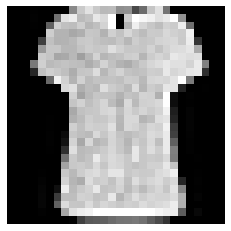

In [8]:
img_name = rng.choice(train.id)
filepath = os.path.join(root_dir,'Downloads', 'Identify_the_Apparels', 'train','train', str(img_name)+".png")

img = cv2.imread(filepath,0)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
temp = []
for img_name in train.id:
    image_path = os.path.join(root_dir,'Downloads', 'Identify_the_Apparels','train','train', str(img_name)+".png")
    img = cv2.imread(image_path,0)
    img = img.astype('float32')
    temp.append(img)

train_x= np.stack(temp)

In [10]:
train_x.shape

(60000, 28, 28)

In [11]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)

In [12]:
train_x = train_x/255 

train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [13]:
train_y.shape

(60000, 10)

In [14]:
split_size = int(train_x.shape[0]*0.8)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [15]:
print("Shape of training features: {}".format(train_x.shape))
print("Shape of training lables: {}".format(train_y.shape))
print("Shape of testing features: {}".format(val_x.shape))
print("Shape of testing lables: {}".format(val_y.shape))

Shape of training features: (48000, 28, 28, 1)
Shape of training lables: (48000, 10)
Shape of testing features: (12000, 28, 28, 1)
Shape of testing lables: (12000, 10)


In [16]:
temp = []
for img_name in test.id:
    image_path = os.path.join(root_dir,'Downloads', 'Identify_The_Apparels' , 'test','test', str(img_name)+".png")
    img = cv2.imread(image_path,0)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
test_x /= 255.0

In [17]:
test_x.shape

(10000, 28, 28, 1)

In [18]:
#ANN Model
train_x1= train_x.reshape(train_x.shape[0], 784)
model1 = Sequential()
model1.add(Dense(train_x1.shape[1], input_dim=train_x1.shape[1], kernel_initializer='normal', activation='relu'))
model1.add(Dense(train_y.shape[1], kernel_initializer='normal', activation='softmax'))
# Compile model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model1.fit(train_x1, train_y, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
 - 23s - loss: 0.4909 - accuracy: 0.8234
Epoch 2/20
 - 22s - loss: 0.3656 - accuracy: 0.8668
Epoch 3/20
 - 22s - loss: 0.3276 - accuracy: 0.8800
Epoch 4/20
 - 22s - loss: 0.3006 - accuracy: 0.8888
Epoch 5/20
 - 22s - loss: 0.2840 - accuracy: 0.8954
Epoch 6/20
 - 23s - loss: 0.2677 - accuracy: 0.8995
Epoch 7/20
 - 23s - loss: 0.2510 - accuracy: 0.9064
Epoch 8/20
 - 23s - loss: 0.2416 - accuracy: 0.9091
Epoch 9/20
 - 22s - loss: 0.2287 - accuracy: 0.9139
Epoch 10/20
 - 22s - loss: 0.2209 - accuracy: 0.9169
Epoch 11/20
 - 22s - loss: 0.2141 - accuracy: 0.9198
Epoch 12/20
 - 22s - loss: 0.2014 - accuracy: 0.9250
Epoch 13/20
 - 23s - loss: 0.1960 - accuracy: 0.9265
Epoch 14/20
 - 22s - loss: 0.1877 - accuracy: 0.9291
Epoch 15/20
 - 24s - loss: 0.1804 - accuracy: 0.9325
Epoch 16/20
 - 23s - loss: 0.1766 - accuracy: 0.9341
Epoch 17/20
 - 22s - loss: 0.1680 - accuracy: 0.9372
Epoch 18/20
 - 23s - loss: 0.1639 - accuracy: 0.9384
Epoch 19/20
 - 22s - loss: 0.1572 - accuracy: 0.9410
Ep

In [20]:
# Final evaluation of the model
val_x1= val_x.reshape(val_x.shape[0], 784)
scores = model1.evaluate(val_x1, val_y, verbose=0)
scores

[0.3536124817778667, 0.893750011920929]

In [21]:
test_x1= test_x.reshape(test_x.shape[0], 784)
pred1 = model1.predict_classes(test_x1)

In [22]:
pred1= pd.Series(pred1)
a= pd.concat([test['id'], pred1], axis=1)
a.columns=['id', 'label']

In [24]:
a.to_csv(os.path.join(root_dir,'Downloads','Identify_The_Apparels', 'annsolution.csv'), index=False)

In [25]:
# Create CNN Model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28,1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               991360    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [27]:
# Fit the model
model.fit(train_x, train_y, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
 - 116s - loss: 0.5279 - accuracy: 0.8122
Epoch 2/10
 - 119s - loss: 0.3544 - accuracy: 0.8733
Epoch 3/10
 - 119s - loss: 0.3052 - accuracy: 0.8897
Epoch 4/10
 - 117s - loss: 0.2730 - accuracy: 0.9006
Epoch 5/10
 - 117s - loss: 0.2490 - accuracy: 0.9094
Epoch 6/10
 - 121s - loss: 0.2262 - accuracy: 0.9168
Epoch 7/10
 - 124s - loss: 0.2147 - accuracy: 0.9195
Epoch 8/10
 - 117s - loss: 0.1960 - accuracy: 0.9274
Epoch 9/10
 - 117s - loss: 0.1833 - accuracy: 0.9312
Epoch 10/10
 - 114s - loss: 0.1729 - accuracy: 0.9341


In [28]:
# Final evaluation of the model
scores = model.evaluate(val_x, val_y, verbose=0)
scores

[0.23570180602371693, 0.9144999980926514]

In [29]:
pred1 = model.predict_classes(test_x)

In [31]:
pred1= pd.Series(pred1)

In [32]:
b= pd.concat([test['id'], pred1], axis=1)
b.columns=['id', 'label']

In [33]:
b.head()

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6


In [34]:
b.to_csv(os.path.join(root_dir,'Downloads','Identify_The_Apparels', 'cnnsolution.csv'), index=False)